# Find Best Logistic Regression Model for Adult Income Dataset

### Kaan Akkartal 2020661

# 1.Library and Data Loading

In [211]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [212]:
income = pd.read_csv("adult_income.csv")

In [213]:
df = income.copy()
df.head()

,ID,age,workclass,education_num,marital_status,occupation,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_high
0,1,39,State-gov,13,Never-married,Adm-clerical,White,Male,2174,0,40,United-States,No
1,2,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,White,Male,0,0,13,United-States,No
2,3,38,Private,9,Divorced,Handlers-cleaners,White,Male,0,0,40,United-States,No
3,4,53,Private,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0,0,40,United-States,No
4,5,28,Private,13,Married-civ-spouse,Prof-specialty,Black,Female,0,0,40,Cuba,No


# 2. Descriptive Data Analysis

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital_gain    32561 non-null  int64 
 9   capital_loss    32561 non-null  int64 
 10  hours_per_week  32561 non-null  int64 
 11  native_country  32561 non-null  object
 12  income_high     32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


Dataset has 10 features, when excluding ID and income_high, which is target variable. 

In [215]:
df.describe()

,ID,age,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [217]:
df.isnull().sum()

ID                0
age               0
workclass         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_high       0
dtype: int64

Data has 32561 observations and 12 variables, ID is not a variable. Income high is the target variable. 

At first glance there are no missing values in the dataset, but it will be certain after visualizing the data. 

## 2.1. Data Visualization

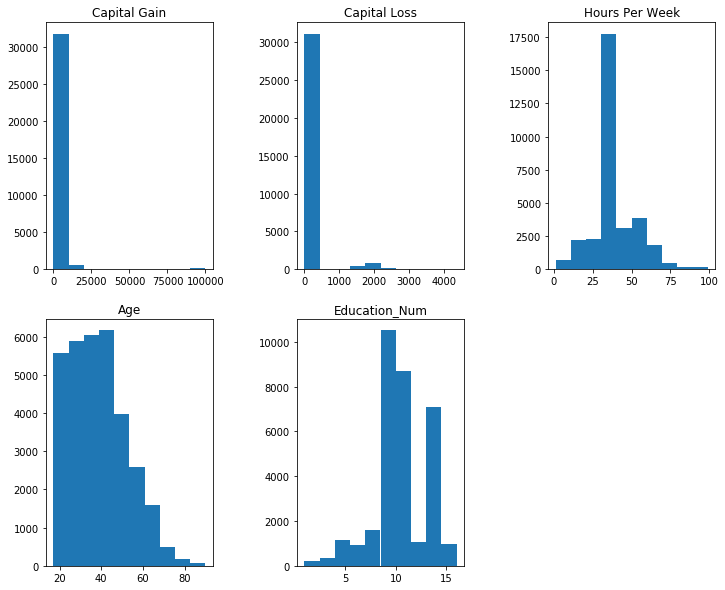

In [218]:
plt.figure(figsize = (12,10))
plt.subplots_adjust(wspace = 0.5)

plt.subplot(2,3,1)
plt.hist(df.capital_gain)
plt.title("Capital Gain")

plt.subplot(2,3,2)
plt.hist(df.capital_loss)
plt.title("Capital Loss")

plt.subplot(2,3,3)
plt.hist(df.hours_per_week)
plt.title("Hours Per Week")

plt.subplot(2,3,4)
plt.hist(df.age)
plt.title("Age")

plt.subplot(2,3,5)
plt.hist(df.education_num)
plt.title("Education_Num");

Most of the observarions have less than 12500 capital gain and less than 500 units capital loss. They work mostly around 30-35 hours per week. There are less and high educated people and their ages are most likely in between 20-50. However there also older people than 50 years. 

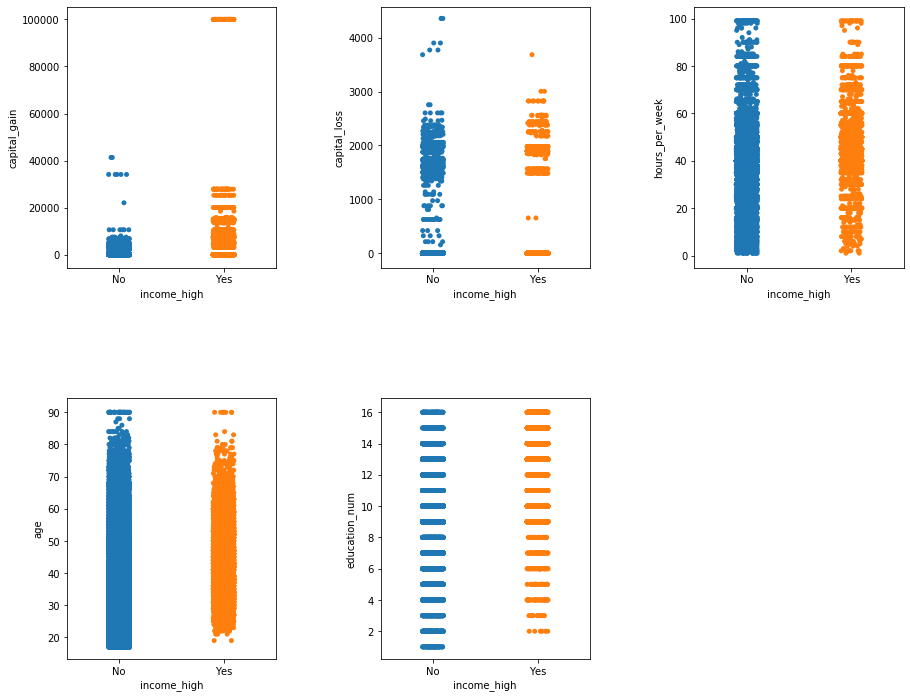

In [219]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

plt.subplot(2,3,1)
sns.stripplot(x = "income_high", y = "capital_gain", data = df)

plt.subplot(2,3,2)
sns.stripplot(x = "income_high", y = "capital_loss", data = df)

plt.subplot(2,3,3)
sns.stripplot(x = "income_high", y = "hours_per_week", data = df)

plt.subplot(2,3,4)
sns.stripplot(x = "income_high", y = "age", data = df)

plt.subplot(2,3,5)
sns.stripplot(x = "income_high", y = "education_num", data = df);


It is hard to comment by using stripplots. However, it seems that higher income is related to higher capital gain. 

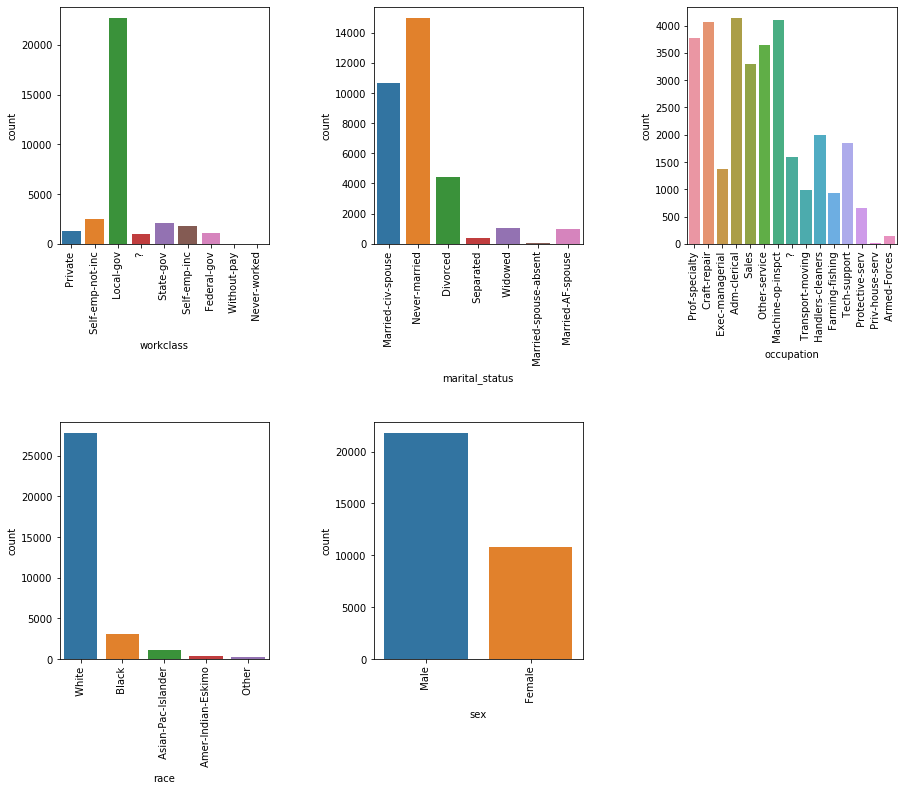

In [220]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.75)


plt.subplot(2,3,1)
sns.countplot(x = "workclass", data = df).set_xticklabels(labels = df.workclass.value_counts().index, rotation = 90)

plt.subplot(2,3,2)
sns.countplot(x = "marital_status", data = df).set_xticklabels(labels = df.marital_status.value_counts().index, rotation = 90)

plt.subplot(2,3,3)
sns.countplot(x = "occupation", data = df).set_xticklabels(labels = df.occupation.value_counts().index, rotation = 90)

plt.subplot(2,3,4)
sns.countplot(x = "race", data = df).set_xticklabels(labels = df.race.value_counts().index, rotation = 90)

plt.subplot(2,3,5)
sns.countplot(x = "sex", data = df).set_xticklabels(labels = df.sex.value_counts().index, rotation = 90);


Local_gov is the dominant observation in workclass feature, never married people is counted higher than others, there are significantly more white race than others and males are higher than females in this dataset. 

Workclass and occupation features include observations with "?" which means there are missing values inside those variables. They should be examined before the modelling. 

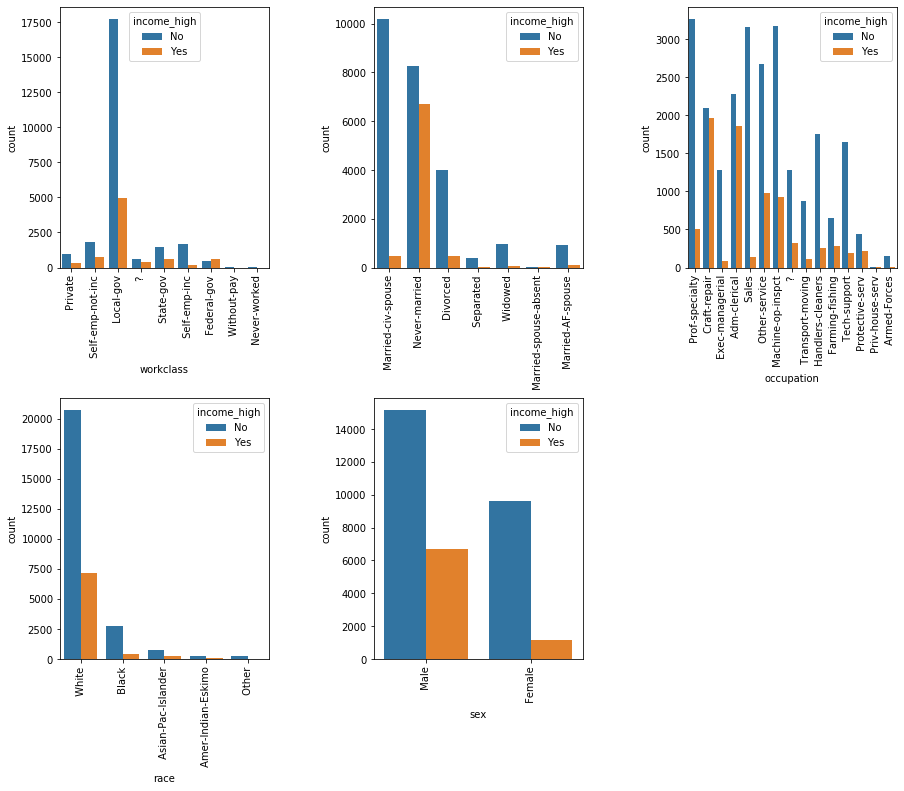

In [19]:
plt.figure(figsize = (15,12)) 
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)


plt.subplot(2,3,1)
sns.countplot(x = "workclass", data = df, hue = "income_high").set_xticklabels(labels = df.workclass.value_counts().index, rotation = 90)

plt.subplot(2,3,2)
sns.countplot(x = "marital_status", data = df, hue = "income_high").set_xticklabels(labels = df.marital_status.value_counts().index, rotation = 90)

plt.subplot(2,3,3)
sns.countplot(x = "occupation", data = df, hue = "income_high").set_xticklabels(labels = df.occupation.value_counts().index, rotation = 90)

plt.subplot(2,3,4)
sns.countplot(x = "race", data = df, hue = "income_high").set_xticklabels(labels = df.race.value_counts().index, rotation = 90)

plt.subplot(2,3,5)
sns.countplot(x = "sex", data = df, hue = "income_high").set_xticklabels(labels = df.sex.value_counts().index, rotation = 90);

The count of observations with high income is less than observations with lower income in each categorical features. It is clear that people with high income are mostly never married. 

## 2.2. Missing Value Analysis

In [44]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [45]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [65]:
df.native_country.value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are missing values on the above features. Below, their index information is obtained. 

In [63]:
df.loc[df.workclass == " ?"].index

Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1836)

In [64]:
df.loc[df.occupation == " ?"].index

Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
              187,
            ...
            32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
            32542],
           dtype='int64', length=1843)

In [66]:
df.loc[df.native_country == " ?"].index

Int64Index([   14,    38,    51,    61,    93,   245,   249,   297,   393,
              453,
            ...
            32213, 32232, 32254, 32307, 32413, 32449, 32469, 32492, 32510,
            32525],
           dtype='int64', length=583)

In [68]:
df.iloc[df.loc[df.workclass == " ?"].index, 2] = np.nan

In [148]:
df.iloc[df.loc[df.occupation == " ?"].index, 5] = np.nan

In [149]:
df.iloc[df.loc[df.native_country == " ?"].index, 11] = np.nan

In [150]:
df.isnull().sum()

ID                   0
age                  0
workclass         1836
education_num        0
marital_status       0
occupation        1843
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income_high          0
dtype: int64

Observations with "?" are transformed to missing values, because they are not counted as missing at the beginning. 

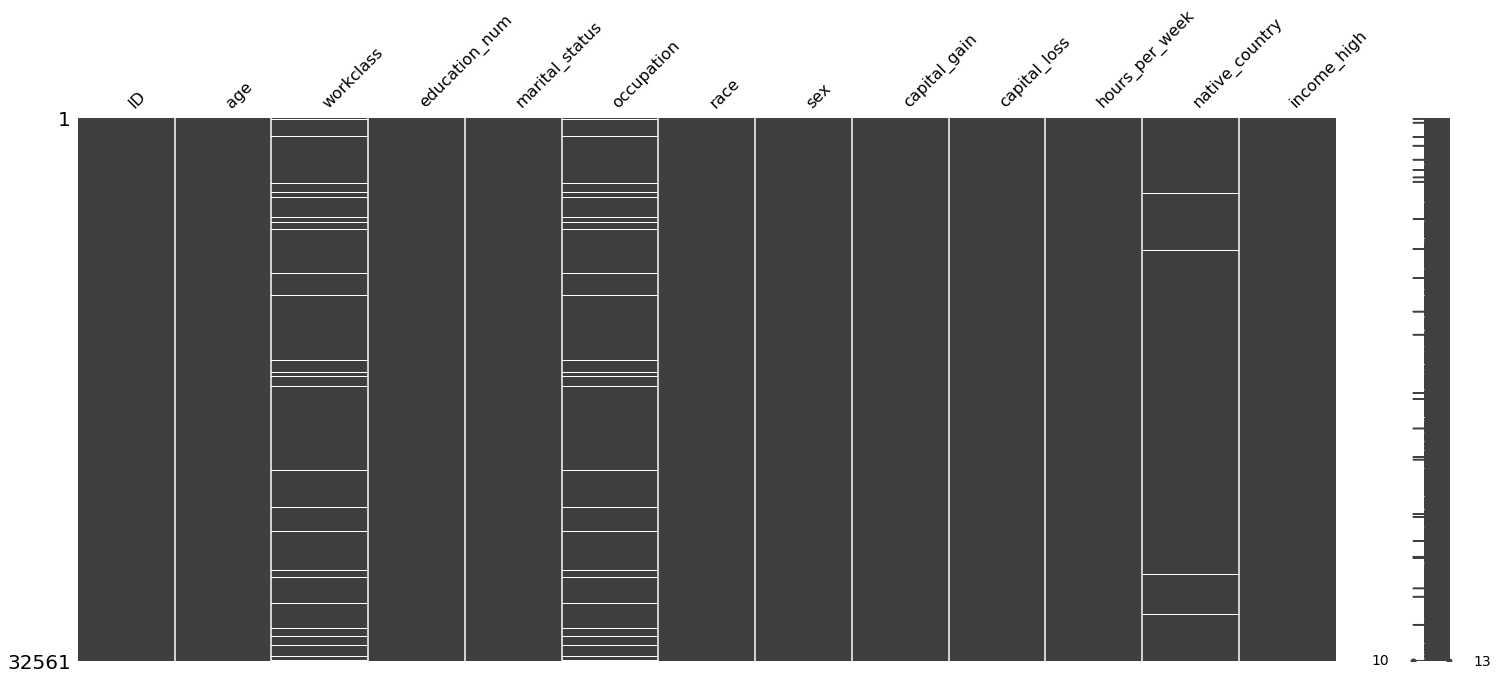

In [151]:
import missingno as msno
msno.matrix(df);

It is obviously seen that missing values in worklcass and occupation features are on the same line. Actually it is logical because if there is no workclass, then there are no occupations. 

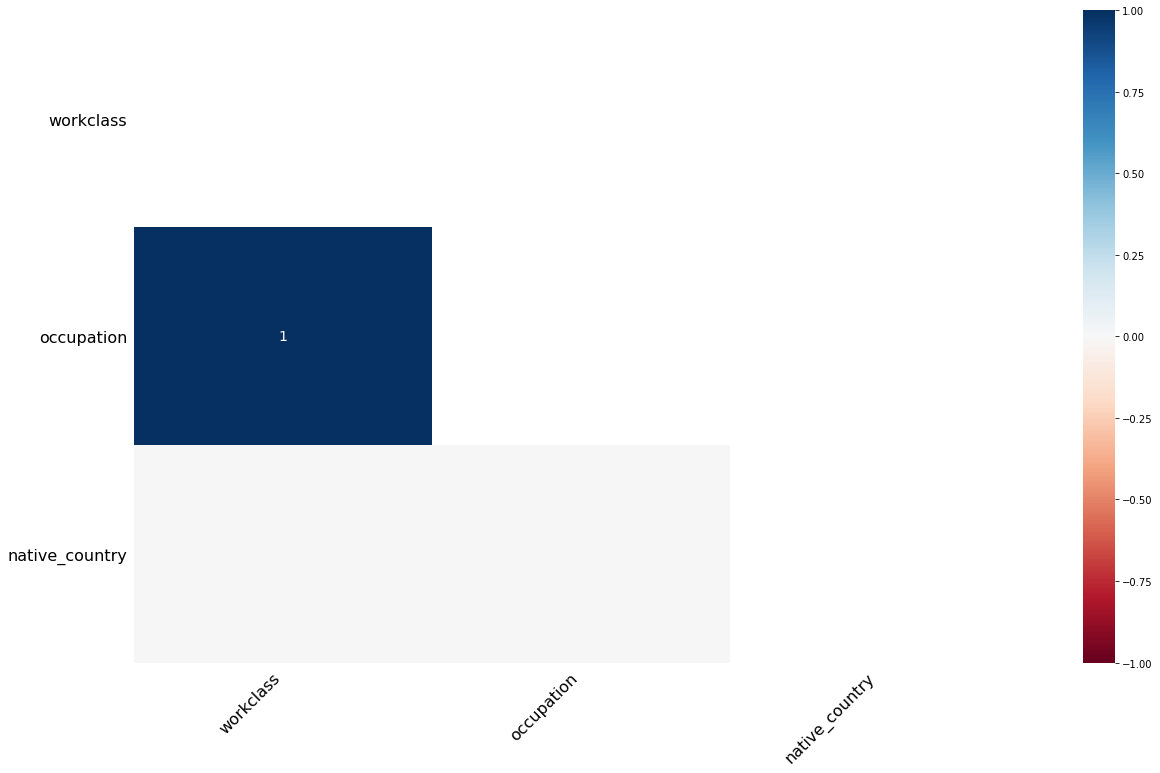

In [167]:
msno.heatmap(df);

Missing values in occupation and workclass are correlated with each other, so they need to be deeper examined. However, in this homework I will fill them with the most frequent values in related features. 

Missing values in native country seem that they are assigned randomly. So, they can be filled with the most frequent observation.

In [173]:
df["workclass"] = df["workclass"].fillna(df.workclass.mode()[0])

In [177]:
df["occupation"] = df["occupation"].fillna(df.occupation.mode()[0])

In [178]:
df["native_country"] = df["native_country"].fillna(df.native_country.mode()[0])

In [179]:
df.isnull().sum()

ID                0
age               0
workclass         0
education_num     0
marital_status    0
occupation        0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_high       0
dtype: int64

## 2.3 Correlation

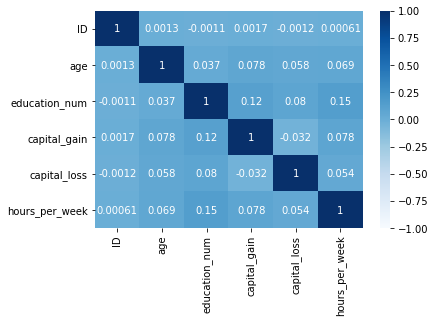

In [184]:
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = "Blues" );

There are no significant correlation between numerical variables. 

## 2.4. Data Preparation 

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital_gain    32561 non-null  int64 
 9   capital_loss    32561 non-null  int64 
 10  hours_per_week  32561 non-null  int64 
 11  native_country  32561 non-null  object
 12  income_high     32561 non-null  object
dtypes: int64(6), object(7)
memory usage: 3.2+ MB


In [191]:
df.workclass = pd.Categorical(df.workclass)
df.marital_status = pd.Categorical(df.marital_status)
df.occupation = pd.Categorical(df.occupation)
df.race = pd.Categorical(df.race)
df.sex = pd.Categorical(df.sex)
df.native_country = pd.Categorical(df.native_country)
df.income_high = pd.Categorical(df.income_high)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   ID              32561 non-null  int64   
 1   age             32561 non-null  int64   
 2   workclass       32561 non-null  category
 3   education_num   32561 non-null  int64   
 4   marital_status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   race            32561 non-null  category
 7   sex             32561 non-null  category
 8   capital_gain    32561 non-null  int64   
 9   capital_loss    32561 non-null  int64   
 10  hours_per_week  32561 non-null  int64   
 11  native_country  32561 non-null  category
 12  income_high     32561 non-null  category
dtypes: category(7), int64(6)
memory usage: 1.7 MB


In [193]:
X = df.drop(columns = ["ID","income_high"])

In [194]:
Y = df.income_high

In [197]:
X = pd.get_dummies(X, drop_first = True)

In [203]:
X

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,0,0,38,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,9,0,0,20,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [202]:
Y = pd.get_dummies(Y, drop_first = True)
Y

,Yes
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


high income yes --> 1

high income no --> 0 

One hot encoding is applied to the dataset. 

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size = 0.40)

Since there are few information about observations having high income, test size is kept high (0.4). 

# 3. Modelling - Logistic Regression 

In [205]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
log_model = LogisticRegression().fit(X_train, Y_train)

C:\Users\Kaan\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kaan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [207]:
log_model_score = accuracy_score(Y_test, log_model.predict(X_test))

In [208]:
print("Logistic regression accuracy score is: " , log_model_score)

Logistic regression accuracy score is:  0.8218809980806142


In [209]:
print(classification_report(Y_test, log_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      9884
           1       0.69      0.48      0.56      3141

    accuracy                           0.82     13025
   macro avg       0.77      0.70      0.73     13025
weighted avg       0.81      0.82      0.81     13025

